In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [2]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/aofa_lond_out.csv'

In [3]:
df = pd.read_csv(path_to_data)

In [5]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style:groove;
}
</style>

In [4]:
df.head()

,Days,Speed
0,16/10/2018 00:00,690.415634
1,16/10/2018 01:00,762.059386
2,16/10/2018 02:00,675.971718
3,16/10/2018 03:00,620.564280
4,16/10/2018 04:00,667.688283


In [6]:
df.tail()

,Days,Speed
2155,13/01/2019 19:00,218.709408
2156,13/01/2019 20:00,208.164222
2157,13/01/2019 21:00,215.351361
2158,13/01/2019 22:00,323.162112
2159,13/01/2019 23:00,305.765805


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 2 columns):
Days     2160 non-null object
Speed    2160 non-null float64
dtypes: float64(1), object(1)
memory usage: 33.8+ KB


In [8]:
df.isnull().sum()
df.dtypes

Days      object
Speed    float64
dtype: object

Text(0.5,1,'Aofa_Lond_in Link Speed Over Time In Hours')

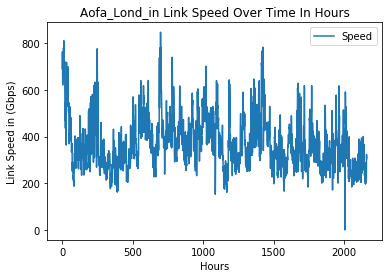

In [9]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Link Speed in (Gbps)')
plt.title('Aofa_Lond_in Link Speed Over Time In Hours')

In [10]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [11]:
df.dtypes

Days     datetime64[ns]
Speed           float64
dtype: object

In [12]:
df = df.set_index('Days')

In [13]:
df.head()

,Speed
Days,
2018-10-16 00:00:00,690.415634
2018-10-16 01:00:00,762.059386
2018-10-16 02:00:00,675.971718
2018-10-16 03:00:00,620.564280
2018-10-16 04:00:00,667.688283


In [14]:
df.tail()

,Speed
Days,
2019-01-13 19:00:00,218.709408
2019-01-13 20:00:00,208.164222
2019-01-13 21:00:00,215.351361
2019-01-13 22:00:00,323.162112
2019-01-13 23:00:00,305.765805


In [15]:
average_daily_speed = df.resample('D').mean()

In [16]:
average_daily_speed.dtypes

Speed    float64
dtype: object

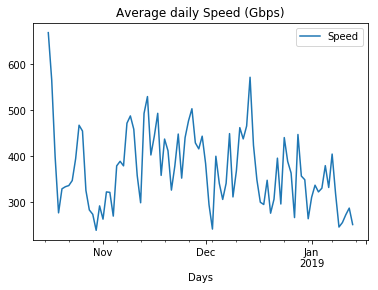

In [17]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

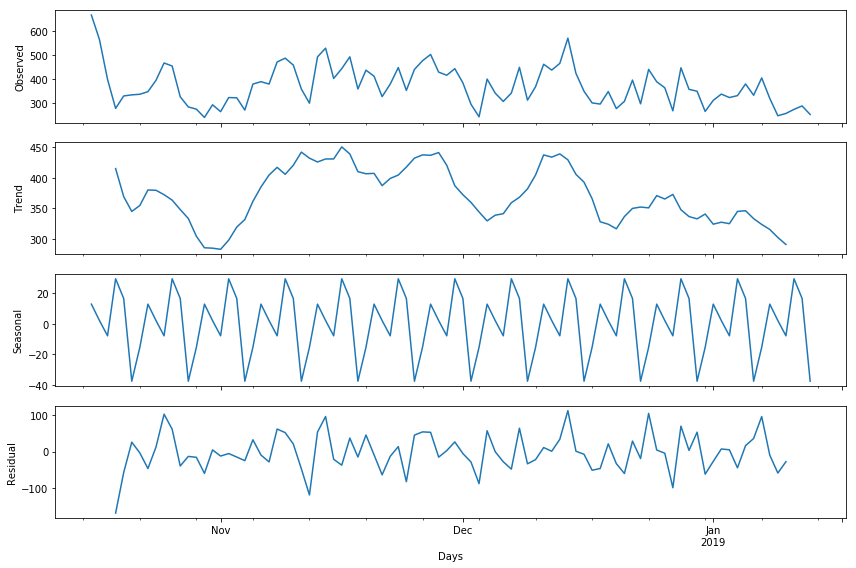

In [18]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.show()

In [19]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [20]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1310.2445058419516
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1068.0455872490277
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:943.234850990749
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:761.3682464792294
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:961.6081974833642
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:909.1514239629582
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:783.7657726629625
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:763.2572513257284
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1204.2665167764171
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1000.2839151089078
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:910.9728257258001
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:736.9218217982257
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:941.7950281767896
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:878.5001049266034
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:766.1473321815407
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:738.8963067165688
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1013.984820995398
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:877.2889156470377
ARIMA(0

In [28]:
#Lowest AIC : ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:724.5303729269774

In [29]:
mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3287      0.162      2.033      0.042       0.012       0.646
ma.L1         -0.8754      0.096     -9.145      0.000      -1.063      -0.688
ma.S.L12      -1.0000      0.182     -5.487      0.000      -1.357      -0.643
sigma2      3973.1386   4.59e-05   8.66e+07      0.000    3973.138    3973.139


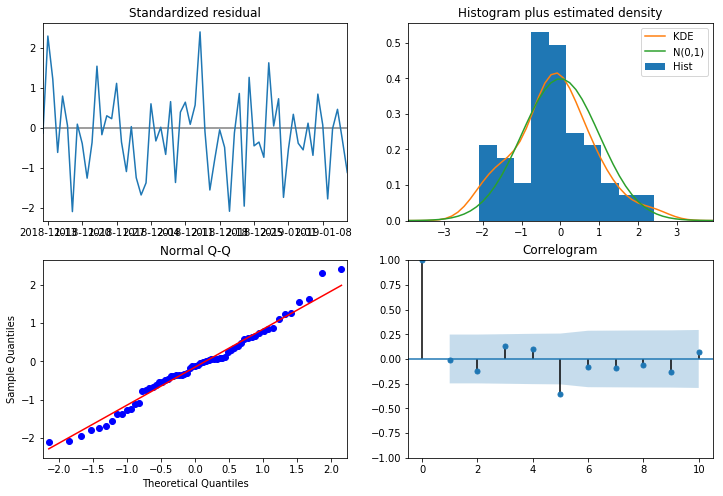

In [30]:
results.plot_diagnostics()
plt.show()

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-20'), dynamic=False)
pred_ci = pred.conf_int()

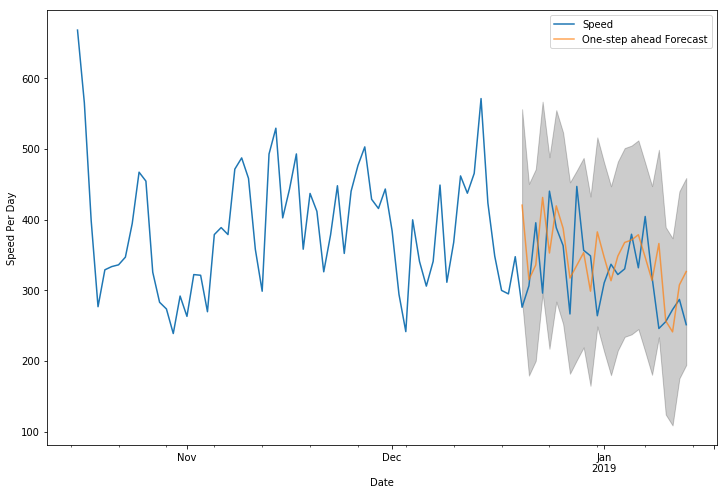

In [33]:
ax = average_daily_speed['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Speed Per Day')
plt.legend()

plt.show()